<a href="https://colab.research.google.com/github/kiran-bhandari16/LSTM-Stock-Price-Prediciton/blob/main/Regression_Stock_Price_Prediction_with_Sentiment_Polarity_and_Subjectivity_with_Look_Back.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [157]:
# Import libraries
import pandas as pd
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from textblob import TextBlob

import warnings
warnings.filterwarnings('ignore')

from pandas import read_csv
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model
from sklearn import ensemble

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


In [31]:
from google.colab import files
uploaded = files.upload()

In [65]:
df=pd.read_csv("Final-Dataset-for-Stock-Price-Prediction.csv",index_col=0)
df.head()

,Open,High,Low,Qty,Turnover,economic-subjectivity,economic-polarity,political-subjectivity,political-polarity,Ltp,% Change
Date,,,,,,,,,,,
2022-06-29,318.9,318.9,310.0,310.0,6127716.2,0.457500,0.017500,0.460909,-0.122727,315.0,0.64
2022-06-28,312.0,316.5,306.0,306.0,5707986.7,0.195556,0.017778,0.425000,0.350000,313.0,0.32
2022-06-27,322.0,325.0,310.0,310.0,11125995.5,0.225000,-0.012500,0.457792,0.169481,312.0,-2.50
2022-06-26,312.9,320.0,308.0,308.0,28577745.1,0.253704,0.038889,0.570909,0.241818,320.0,4.23
2022-06-24,305.0,310.0,298.2,298.2,25399389.8,0.280303,0.042424,0.300000,0.128788,307.0,-0.97


In [66]:
df

,Open,High,Low,Qty,Turnover,economic-subjectivity,economic-polarity,political-subjectivity,political-polarity,Ltp,% Change
Date,,,,,,,,,,,
2022-06-29,318.9,318.9,310.0,310.0,6127716.2,0.457500,0.017500,0.460909,-0.122727,315.0,0.64
2022-06-28,312.0,316.5,306.0,306.0,5707986.7,0.195556,0.017778,0.425000,0.350000,313.0,0.32
2022-06-27,322.0,325.0,310.0,310.0,11125995.5,0.225000,-0.012500,0.457792,0.169481,312.0,-2.50
2022-06-26,312.9,320.0,308.0,308.0,28577745.1,0.253704,0.038889,0.570909,0.241818,320.0,4.23
2022-06-24,305.0,310.0,298.2,298.2,25399389.8,0.280303,0.042424,0.300000,0.128788,307.0,-0.97
...,...,...,...,...,...,...,...,...,...,...,...
2016-07-17,869.0,955.0,886.0,886.0,2538590.0,0.277273,0.218182,0.461818,0.004545,955.0,0.00
2016-07-14,790.0,869.0,805.0,805.0,151344.0,0.303030,0.090909,0.326515,-0.087879,869.0,0.00
2016-07-13,719.0,790.0,733.0,733.0,4231540.0,0.293182,0.337121,0.444805,-0.012987,790.0,0.00


In [67]:
#null value check
df.isna().sum()

Open                      0
High                      0
Low                       0
Qty                       0
Turnover                  0
economic-subjectivity     0
economic-polarity         0
political-subjectivity    0
political-polarity        0
Ltp                       0
% Change                  0
dtype: int64

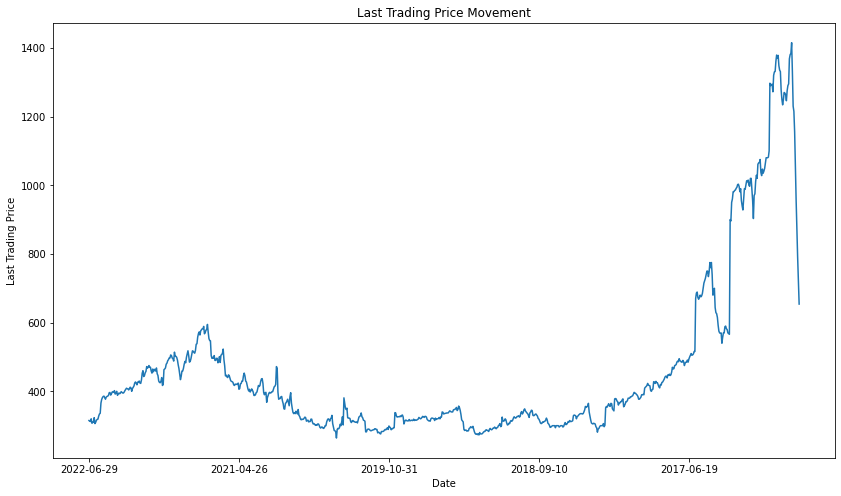

In [68]:
df['Ltp'].plot(figsize=(14,8))
plt.ylabel("Last Trading Price")
plt.title("Last Trading Price Movement")
plt.show()

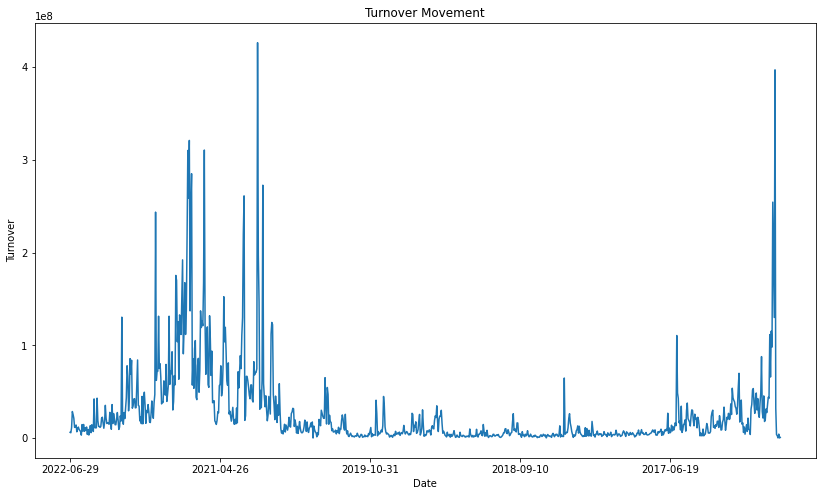

In [69]:
df['Turnover'].plot(figsize=(14,8))
plt.ylabel("Turnover")
plt.title("Turnover Movement")
plt.show()

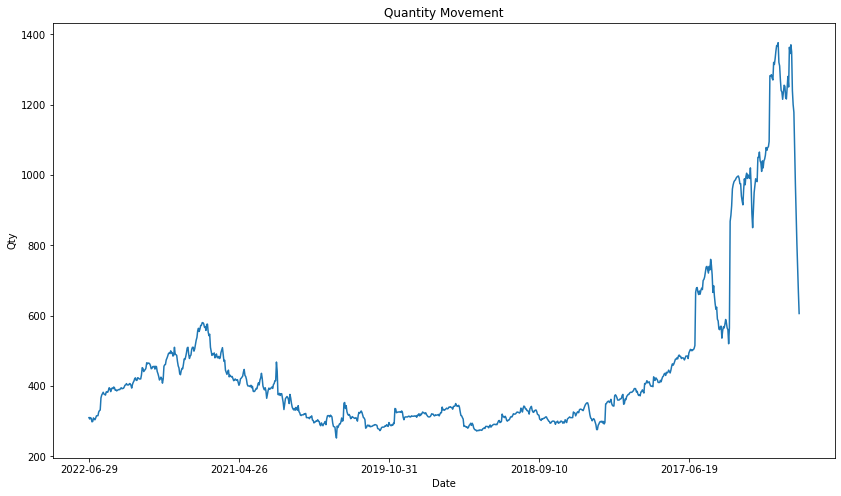

In [70]:
df['Qty'].plot(figsize=(14,8))
plt.ylabel("Qty")
plt.title("Quantity Movement")
plt.show()

In [71]:
df['% Change'].value_counts()

 0.00    322
 0.32     11
-0.32     10
-0.63     10
 0.31      9
        ... 
-1.63      1
-3.37      1
-1.77      1
 2.46      1
 0.27      1
Name: % Change, Length: 345, dtype: int64

In [72]:
## Make correlation matrix 

df.corr()

,Open,High,Low,Qty,Turnover,economic-subjectivity,economic-polarity,political-subjectivity,political-polarity,Ltp,% Change
Open,1.000000,0.999023,0.999335,0.999335,0.249468,0.007509,0.148061,0.001911,0.008607,0.998562,-0.021452
High,0.999023,1.000000,0.999134,0.999134,0.259375,0.006479,0.150168,0.002528,0.009023,0.999587,-0.008835
Low,0.999335,0.999134,1.000000,1.000000,0.246582,0.004674,0.147470,0.002132,0.008001,0.999251,-0.013428
Qty,0.999335,0.999134,1.000000,1.000000,0.246582,0.004674,0.147470,0.002132,0.008001,0.999251,-0.013428
Turnover,0.249468,0.259375,0.246582,0.246582,1.000000,0.002024,0.010022,-0.006702,0.039462,0.253623,0.163820
economic-subjectivity,0.007509,0.006479,0.004674,0.004674,0.002024,1.000000,0.234261,0.029147,0.012509,0.006837,-0.014195
economic-polarity,0.148061,0.150168,0.147470,0.147470,0.010022,0.234261,1.000000,0.025870,-0.029237,0.150450,0.025782
political-subjectivity,0.001911,0.002528,0.002132,0.002132,-0.006702,0.029147,0.025870,1.000000,0.231214,0.003092,-0.021782
political-polarity,0.008607,0.009023,0.008001,0.008001,0.039462,0.012509,-0.029237,0.231214,1.000000,0.009975,-0.025224
Ltp,0.998562,0.999587,0.999251,0.999251,0.253623,0.006837,0.150450,0.003092,0.009975,1.000000,-0.001303


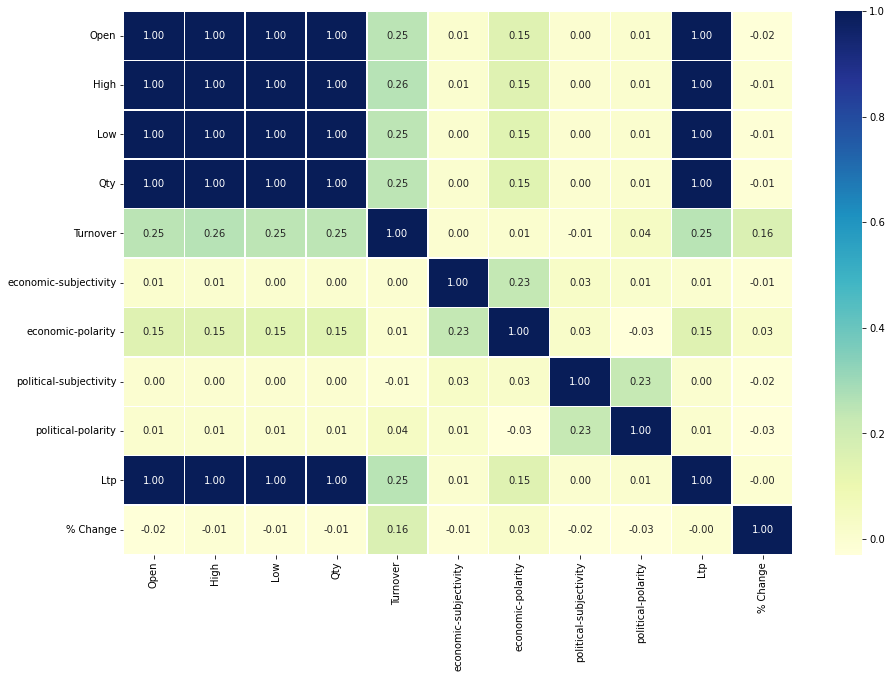

In [73]:
## making correlation matrix more understable 

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax =  sns.heatmap(corr_matrix,
                  annot=True,
                  linewidth=0.5,
                  fmt=".2f",
                  cmap="YlGnBu",);

In [79]:
df.dtypes

Open                      float64
High                      float64
Low                       float64
Qty                       float64
Turnover                  float64
economic-subjectivity     float64
economic-polarity         float64
political-subjectivity    float64
political-polarity        float64
Ltp                       float64
% Change                  float64
dtype: object

In [80]:
# Create feature data set
X = df
X = np.array(X.drop(['Ltp'], 1))

# Create target data set
y = np.array(df['Ltp'])

In [81]:
X.shape, y.shape

((948, 10), (948,))

In [94]:
len(df)

948

In [97]:
split = int(0.9*len(df))

In [99]:
split

853

In [108]:
y = np.reshape(y, (y.shape[0], 1))

In [109]:
y.shape

(948, 1)

In [110]:
X[0:853,:].shape

(853, 10)

In [112]:
y[853:948,:].shape

(95, 1)

In [115]:
X = X[0:split,:] 
y = y[split:len(y),:]

In [116]:
X.shape, y.shape

((853, 10), (95, 1))

**Lets split the data into 5 folds.**

In [118]:
# # Check split the data into 5 folds.  
# kf5 =KFold(n_splits=5, shuffle=True, random_state=42)


# count = 1
# for train_index5, test_index5 in kf5.split(X, y):
#     print(f'Fold:{count}, Train set: {len(train_index5)}, Test set:{len(test_index5)}')
#     count += 1

In [119]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [120]:
look_back = 5
X_train, y_train = create_dataset(X, look_back)
X_test, y_test = create_dataset(y, look_back)

In [122]:
X_train.shape, y_train.shape,X_test.shape,y_test.shape

((847, 5), (847,), (89, 5), (89,))

In [123]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

**Modeling**

In [124]:
models = {"LinearRegression":LinearRegression(),
          "MLPRegressor": MLPRegressor(),
          "SVM":SVR(),
          'Ridge': Ridge(),
          "KNN":KNeighborsRegressor(),
          "RandomForestRegressor":RandomForestRegressor(),
        }

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test): 
    """
    Fits and evaluates given machine learning models.
    models: a dict of different Scikit-Learn machine learning models
    X_train: training data(with no labels)
    X_test: testing data(with no labels)
    y_train: training labels
    y_test: testing labels
    """
    
    #set random seed
    np.random.seed(42)

    # Making a dictionary to keep model scoresS
    model_scores = {}

    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)

        #Evaluate the model and  append  it's score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [125]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

In [126]:
model_scores

{'LinearRegression': 0.9411546035473812,
 'MLPRegressor': -27.143802724598643,
 'SVM': -18.768818188905794,
 'Ridge': 0.9374639218449975,
 'KNN': -5.500606899772547,
 'RandomForestRegressor': -5.112146062251897}

**Hyperparameter Tuning**

In [128]:
grid_regr = {
    'fit_intercept': ['True','False'],
    'positive': ['True','False'],
}

grid_mlp = {
    'hidden_layer_sizes': (150,100,50),
     'max_iter' : [100,200,300,500,1000],
     'activation' : ['relu','identity', 'logistic', 'tanh'],
     'solver' : ['adam','lbfgs','sgd'],
     'validation_fraction': np.arange(0.0,1.0)
}

grid_svm = {
    'C': [0.1, 1, 10, 100, 1000], 
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf','linear', 'poly', 'sigmoid']
    }

grid_ridge = {
    'alpha':[200, 230, 250,265, 270, 275, 290, 300, 500]
}

grid_knn ={
    'leaf_size':np.arange(1,50),
    'n_neighbors':np.arange(1,30),
    'p':[1,2]
}

grid_rf = {
    'n_estimators': [20, 50, 100, 500, 1000],  
    'max_depth': np.arange(1, 15, 1),  
    'min_samples_split': [2, 10, 9], 
    'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
    'bootstrap': [True, False], 
    'random_state': [1, 2, 30, 42]
}

**Tune Linear Regression**

In [129]:
np.random.seed(42)

# Setup random hyperparameter search for LinearRegression
regr = RandomizedSearchCV(LinearRegression(),
                                param_distributions=grid_regr,
                                cv=10,
                                n_iter=10,
                                verbose=True,
                                n_jobs=-1)

#Fit random hyperparameter search model for LinearRegression 
regr.fit(X_train,y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


RandomizedSearchCV(cv=10, estimator=LinearRegression(), n_jobs=-1,
                   param_distributions={'fit_intercept': ['True', 'False'],
                                        'positive': ['True', 'False']},
                   verbose=True)

In [130]:
# Find the best parameters
regr.best_params_

{'positive': 'True', 'fit_intercept': 'True'}

In [131]:
# Evaluate the randomized search LinearRegression Model
regr.score(X_test, y_test)

0.9395019034249609

In [132]:
model_scores

{'LinearRegression': 0.9411546035473812,
 'MLPRegressor': -27.143802724598643,
 'SVM': -18.768818188905794,
 'Ridge': 0.9374639218449975,
 'KNN': -5.500606899772547,
 'RandomForestRegressor': -5.112146062251897}

**Tune Multi Layer Perceptron Regressor**

In [133]:
np.random.seed(42)

# Setup random hyperparameter search for MLPRegressor
mlp = RandomizedSearchCV(MLPRegressor(),
                         param_distributions=grid_mlp,
                         cv=10,
                         n_iter=10,
                         verbose=True,
                         n_jobs=-1)

#Fit random hyperparameter search model for MLPRegressor 
mlp.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=MLPRegressor(), n_jobs=-1,
                   param_distributions={'activation': ['relu', 'identity',
                                                       'logistic', 'tanh'],
                                        'hidden_layer_sizes': (150, 100, 50),
                                        'max_iter': [100, 200, 300, 500, 1000],
                                        'solver': ['adam', 'lbfgs', 'sgd'],
                                        'validation_fraction': array([0.])},
                   verbose=True)

In [134]:
# Find the best parameters
mlp.best_params_

{'validation_fraction': 0.0,
 'solver': 'lbfgs',
 'max_iter': 200,
 'hidden_layer_sizes': 100,
 'activation': 'relu'}

In [135]:
# Evaluate the randomized search MLPRegressor Model
mlp.score(X_test, y_test)

0.9488335795413604

In [136]:
model_scores

{'LinearRegression': 0.9411546035473812,
 'MLPRegressor': -27.143802724598643,
 'SVM': -18.768818188905794,
 'Ridge': 0.9374639218449975,
 'KNN': -5.500606899772547,
 'RandomForestRegressor': -5.112146062251897}

**Tune Support Vector Machine Regressor**

In [137]:
np.random.seed(42)

# Setup random hyperparameter search for SVM
svm = RandomizedSearchCV(SVR(),
                         param_distributions=grid_svm,
                         cv=10,
                         n_iter=10,
                         verbose=True,
                         n_jobs=-1)

#Fit random hyperparameter search model for SVM 
svm.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=SVR(), n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf', 'linear', 'poly',
                                                   'sigmoid']},
                   verbose=True)

In [138]:
# Find the best parameters
svm.best_params_

{'kernel': 'linear', 'gamma': 0.001, 'C': 10}

In [139]:
# Evaluate the randomized search SVM Model
svm.score(X_test, y_test)

0.9322796521376517

In [140]:
model_scores

{'LinearRegression': 0.9411546035473812,
 'MLPRegressor': -27.143802724598643,
 'SVM': -18.768818188905794,
 'Ridge': 0.9374639218449975,
 'KNN': -5.500606899772547,
 'RandomForestRegressor': -5.112146062251897}

**Tune Ridge**

In [141]:
np.random.seed(42)

# Setup random hyperparameter search for Ridge Rigressor
ridge = RandomizedSearchCV(Ridge(),
                         param_distributions=grid_ridge,
                         cv=10,
                         n_iter=10,
                         verbose=True,
                         n_jobs=-1)

#Fit random hyperparameter search model for Ridge Rigressor 
ridge.fit(X_train,y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


RandomizedSearchCV(cv=10, estimator=Ridge(), n_jobs=-1,
                   param_distributions={'alpha': [200, 230, 250, 265, 270, 275,
                                                  290, 300, 500]},
                   verbose=True)

In [142]:
# Find the best parameters
ridge.best_params_

{'alpha': 200}

In [143]:
# Evaluate the randomized search Ridge Model
ridge.score(X_test, y_test)

0.7353462896157594

In [144]:
model_scores

{'LinearRegression': 0.9411546035473812,
 'MLPRegressor': -27.143802724598643,
 'SVM': -18.768818188905794,
 'Ridge': 0.9374639218449975,
 'KNN': -5.500606899772547,
 'RandomForestRegressor': -5.112146062251897}

**Tune KNeighborsRegressor**

In [145]:
np.random.seed(42)

# Setup random hyperparameter search for Ridge Rigressor
knn = RandomizedSearchCV(KNeighborsRegressor(),
                         param_distributions=grid_knn,
                         cv=10,
                         n_iter=10,
                         verbose=True,
                         n_jobs=-1)

#Fit random hyperparameter search model for Ridge Rigressor 
knn.fit(X_train,y_train)


Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=KNeighborsRegressor(), n_jobs=-1,
                   param_distributions={'leaf_size': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                                        'p': [1, 2]},
                   verbose=True)

In [146]:
# Find the best parameters
knn.best_params_

{'p': 2, 'n_neighbors': 12, 'leaf_size': 38}

In [147]:
# Evaluate the randomized search SVM Model
knn.score(X_test, y_test)

-5.640035532718713

In [148]:
model_scores

{'LinearRegression': 0.9411546035473812,
 'MLPRegressor': -27.143802724598643,
 'SVM': -18.768818188905794,
 'Ridge': 0.9374639218449975,
 'KNN': -5.500606899772547,
 'RandomForestRegressor': -5.112146062251897}

**Tune random Forest Regressor**

In [149]:
np.random.seed(42)

# Setup random hyperparameter search for RandomForestRegressor
rf = RandomizedSearchCV(RandomForestRegressor(),
                         param_distributions=grid_rf,
                         cv=10,
                         n_iter=10,
                         verbose=True,
                         n_jobs=-1)

#Fit random hyperparameter search model for RandomForestRegressor 
rf.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13]),
                                        'min_samples_split': [2, 10, 9],
                                        'n_estimators': [20, 50, 100, 500,
                                                         1000],
                                        'random_state': [1, 2, 30, 42]},
                   verbose=True)

In [150]:
# Find the best parameters
rf.best_params_

{'random_state': 30,
 'n_estimators': 50,
 'min_samples_split': 9,
 'min_samples_leaf': 7,
 'max_depth': 11,
 'bootstrap': True}

In [151]:
# Evaluate the randomized search RandomForestRegressor Model
rf.score(X_test, y_test)

-5.438426097329437

In [152]:
model_scores

{'LinearRegression': 0.9411546035473812,
 'MLPRegressor': -27.143802724598643,
 'SVM': -18.768818188905794,
 'Ridge': 0.9374639218449975,
 'KNN': -5.500606899772547,
 'RandomForestRegressor': -5.112146062251897}

In [155]:
# test models
models = {  'LinearRegression':LinearRegression(positive= 'True', fit_intercept= 'True'),
            'MLPRegressor': MLPRegressor(validation_fraction= 0.0, solver='lbfgs', 
                                         max_iter=200, hidden_layer_sizes=100, activation='relu'),
            'SVM': SVR(kernel= 'linear', gamma= 0.001, C=10),
            'Ridge':Ridge(alpha= 200),
            'KNN': KNeighborsRegressor(p= 2, n_neighbors= 12, leaf_size= 38),
            'RandomForestRegressor': RandomForestRegressor(random_state= 30, n_estimators= 50, min_samples_split= 9, 
                                                            min_samples_leaf= 7, max_depth= 11, bootstrap= True)
            }

for model_name in models.keys():

    model = models[model_name]
    print('\n'+'--------------',model_name,'---------------'+'\n')
    model.fit(X_train,y_train)
    predict = model.predict(X_test)
    print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
    print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
    print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
    print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
    print(f'Train Score : {model.score(X_train, y_train) * 100:.2f}% and Test Score : {model.score(X_test, y_test) * 100:.2f}% using {model_name}.')
    errors = abs(predict - y_test)
    mape = 100 * (errors / y_test)
    accuracy = 100 - np.mean(mape)
    print('Accuracy:', round(accuracy, 2), '%.')


-------------- LinearRegression ---------------

Mean Absolute Error: 25.2292
Mean Squared Error: 1571.9581
Root Mean Squared Error: 39.6479
(R^2) Score: 0.9395
Train Score : 98.55% and Test Score : 93.95% using LinearRegression.
Accuracy: 97.67 %.

-------------- MLPRegressor ---------------

Mean Absolute Error: 24.2931
Mean Squared Error: 1477.9509
Root Mean Squared Error: 38.4441
(R^2) Score: 0.9431
Train Score : 98.62% and Test Score : 94.31% using MLPRegressor.
Accuracy: 97.82 %.

-------------- SVM ---------------

Mean Absolute Error: 25.9454
Mean Squared Error: 1759.6181
Root Mean Squared Error: 41.9478
(R^2) Score: 0.9323
Train Score : 98.52% and Test Score : 93.23% using SVM.
Accuracy: 97.58 %.

-------------- Ridge ---------------

Mean Absolute Error: 65.6613
Mean Squared Error: 6876.655
Root Mean Squared Error: 82.9256
(R^2) Score: 0.7353
Train Score : 97.02% and Test Score : 73.53% using Ridge.
Accuracy: 93.96 %.

-------------- KNN ---------------

Mean Absolute Error:

**Hyperparameter Tuning with GridSearchCV**

In [161]:
np.random.seed(42)

gs_rf = GridSearchCV(MLPRegressor(),
                           param_grid=grid_mlp,
                           cv=10,
                           verbose=True,
                           n_jobs=4)
#Fit grid hyperparameter search model for RandomForestClassifer
gs_rf.fit(X_train, y_train)


Fitting 10 folds for each of 180 candidates, totalling 1800 fits


GridSearchCV(cv=10, estimator=MLPRegressor(), n_jobs=4,
             param_grid={'activation': ['relu', 'identity', 'logistic', 'tanh'],
                         'hidden_layer_sizes': (150, 100, 50),
                         'max_iter': [100, 200, 300, 500, 1000],
                         'solver': ['adam', 'lbfgs', 'sgd'],
                         'validation_fraction': array([0.])},
             verbose=True)

In [163]:
#Find the best hyperparameter for RandomForestClassifier
gs_rf.best_params_

{'activation': 'identity',
 'hidden_layer_sizes': 100,
 'max_iter': 1000,
 'solver': 'lbfgs',
 'validation_fraction': 0.0}

In [164]:
#Evaluate the Grid Search RandomForestClassifier
gs_rf.score(X_test,y_test)

0.9411541390532673

In [165]:
## ideal hyperparameter
ideal_model = MLPRegressor(activation= 'identity', hidden_layer_sizes= 100, max_iter= 1000, 
                           solver= 'lbfgs', validation_fraction= 0.0)

In [162]:
# MLPRegressor().get_params().keys()

In [166]:
## Fit the model
ideal_model.fit(X_train, y_train)


MLPRegressor(activation='identity', hidden_layer_sizes=100, max_iter=1000,
             solver='lbfgs', validation_fraction=0.0)

In [167]:
ideal_model.score(X_test, y_test)

0.9411543863842473

In [179]:
X_test.shape

(89, 5)

In [168]:
predict = ideal_model.predict(X_test)


In [169]:
df

,Open,High,Low,Qty,Turnover,economic-subjectivity,economic-polarity,political-subjectivity,political-polarity,Ltp,% Change
Date,,,,,,,,,,,
2022-06-29,318.9,318.9,310.0,310.0,6127716.2,0.457500,0.017500,0.460909,-0.122727,315.0,0.64
2022-06-28,312.0,316.5,306.0,306.0,5707986.7,0.195556,0.017778,0.425000,0.350000,313.0,0.32
2022-06-27,322.0,325.0,310.0,310.0,11125995.5,0.225000,-0.012500,0.457792,0.169481,312.0,-2.50
2022-06-26,312.9,320.0,308.0,308.0,28577745.1,0.253704,0.038889,0.570909,0.241818,320.0,4.23
2022-06-24,305.0,310.0,298.2,298.2,25399389.8,0.280303,0.042424,0.300000,0.128788,307.0,-0.97
...,...,...,...,...,...,...,...,...,...,...,...
2016-07-17,869.0,955.0,886.0,886.0,2538590.0,0.277273,0.218182,0.461818,0.004545,955.0,0.00
2016-07-14,790.0,869.0,805.0,805.0,151344.0,0.303030,0.090909,0.326515,-0.087879,869.0,0.00
2016-07-13,719.0,790.0,733.0,733.0,4231540.0,0.293182,0.337121,0.444805,-0.012987,790.0,0.00


In [170]:
predictions = pd.DataFrame({"Predictions": predict}, index=pd.date_range(start=df.index[0], periods=len(predict), freq="D"))

In [171]:
predictions

,Predictions
2022-06-29,958.526293
2022-06-30,960.900499
2022-07-01,979.359577
2022-07-02,978.600143
2022-07-03,982.683065
...,...
2022-09-21,1146.566128
2022-09-22,1046.059970
2022-09-23,952.240843
2022-09-24,864.210699


In [172]:
fivedays_df = pd.DataFrame(predictions[:5])

In [173]:
fivedays_df

,Predictions
2022-06-29,958.526293
2022-06-30,960.900499
2022-07-01,979.359577
2022-07-02,978.600143
2022-07-03,982.683065


In [174]:
buy_price = min(fivedays_df["Predictions"])
sell_price = max(fivedays_df["Predictions"])

In [175]:
fivedays_buy = fivedays_df.loc[fivedays_df["Predictions"] == buy_price]
fivedays_sell = fivedays_df.loc[fivedays_df["Predictions"] == sell_price]


Buy price and date
            Predictions
2022-06-29   958.526293
Sell price and date
            Predictions
2022-07-03   982.683065


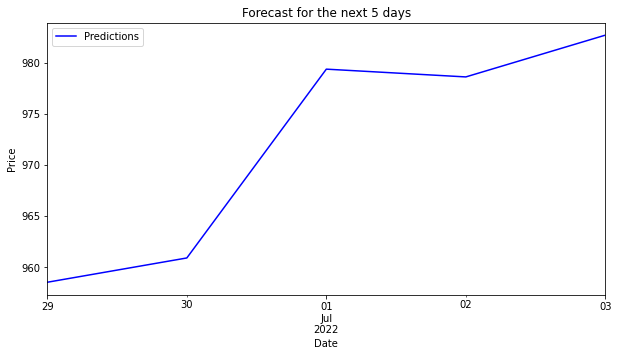

In [176]:
print("Buy price and date")
print(fivedays_buy)
print("Sell price and date")
print(fivedays_sell)
fivedays_df["Predictions"].plot(figsize=(10, 5), title="Forecast for the next 5 days", color="blue")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()